In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)

In [4]:
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]


In [5]:
top_50_airorts = df["Origin"].value_counts()[:50].index
df = df[df["Origin"].isin(top_50_airorts)]

In [6]:

# #df = make_data(stats.norm(0, 3).rvs(50))
# fit = smf.ols('DepDelay ~ Reporting_Airline + Origin', data=df).fit()
# fit.summary()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
#reg = LinearRegression().fit(X, y)

In [8]:
X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
X

<1571080x81 sparse matrix of type '<class 'numpy.float64'>'
	with 3118939 stored elements in Compressed Sparse Row format>

In [9]:
reg = LinearRegression().fit(X, df[["DepDelay"]])

In [10]:
reg.coef_

array([[-0.05733605, -1.12686019,  4.3748374 , -0.46051647,  1.83777578,
        -0.5191512 ,  0.01312118,  4.36345116,  2.22318665,  0.63622637,
         3.94589884, -3.62861865,  1.64986217, -2.1403295 , -1.89830374,
         0.39048765,  2.64758117, -1.45867448,  3.56058323,  0.50900655,
        -3.19025801,  2.50805518,  1.98019401,  0.46822779, -2.70810827,
         1.45692217, -1.00571761,  1.43922126,  3.25864881,  0.74853342,
         3.32030279, -0.55183076,  4.51370974,  0.11924754,  1.71364738,
         3.63772521,  3.26057565,  1.04289924,  3.99912148,  2.4324003 ,
         1.97430076,  1.49220178,  1.32744857,  3.94405793,  4.54357706,
         4.19490165,  6.78299023,  3.72993929, -0.5591199 ,  2.27304363,
         3.53574745,  2.65283621,  1.17404735,  5.79517959,  2.55459399,
         2.56615775,  4.16135584,  1.38677421,  2.76071732,  4.3764234 ,
         2.29769699,  4.95292515,  3.01212266,  0.90647404,  0.40236898,
         6.37644047,  0.51143521,  5.41589198,  1.6

In [11]:
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()

In [12]:
cols

array(['Reporting_Airline_AA', 'Reporting_Airline_AS',
       'Reporting_Airline_B6', 'Reporting_Airline_CO',
       'Reporting_Airline_DH', 'Reporting_Airline_DL',
       'Reporting_Airline_EA', 'Reporting_Airline_EV',
       'Reporting_Airline_F9', 'Reporting_Airline_FL',
       'Reporting_Airline_G4', 'Reporting_Airline_HA',
       'Reporting_Airline_HP', 'Reporting_Airline_KH',
       'Reporting_Airline_ML (1)', 'Reporting_Airline_MQ',
       'Reporting_Airline_NK', 'Reporting_Airline_NW',
       'Reporting_Airline_OH', 'Reporting_Airline_OO',
       'Reporting_Airline_PA (1)', 'Reporting_Airline_PI',
       'Reporting_Airline_PS', 'Reporting_Airline_TW',
       'Reporting_Airline_TZ', 'Reporting_Airline_UA',
       'Reporting_Airline_US', 'Reporting_Airline_VX',
       'Reporting_Airline_WN', 'Reporting_Airline_XE',
       'Reporting_Airline_YV', 'Reporting_Airline_YX', 'Origin_ATL',
       'Origin_AUS', 'Origin_BNA', 'Origin_BOS', 'Origin_BWI',
       'Origin_CLE', 'Origin_CLT', 

In [13]:
reg.coef_.shape

(1, 81)

In [14]:
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})

In [15]:
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs

,name,coef,category
0,Reporting_Airline_AA,-0.057336,Airline
1,Reporting_Airline_AS,-1.126860,Airline
2,Reporting_Airline_B6,4.374837,Airline
3,Reporting_Airline_CO,-0.460516,Airline
4,Reporting_Airline_DH,1.837776,Airline
...,...,...,...
76,Origin_SLC,0.522153,Airport
77,Origin_SMF,0.050975,Airport
78,Origin_SNA,0.183653,Airport
79,Origin_STL,2.709209,Airport


In [16]:
import seaborn as sns

<Axes: xlabel='coef', ylabel='Percent'>

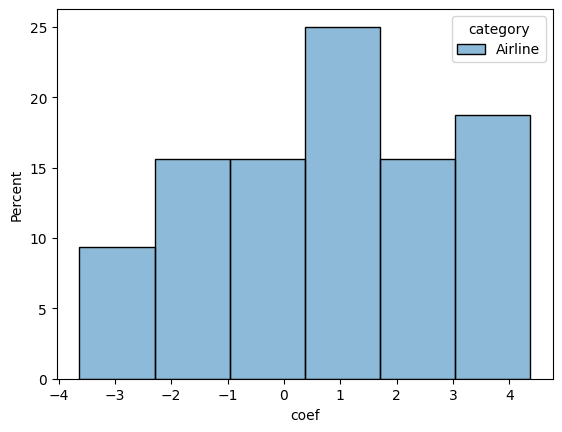

In [17]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airline"], x="coef", hue="category", stat="percent")

<Axes: xlabel='coef', ylabel='Percent'>

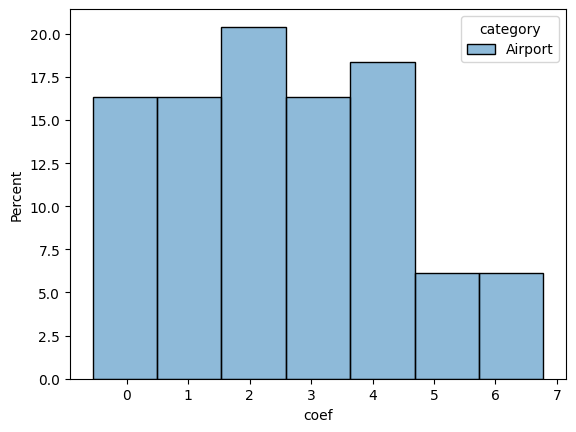

In [18]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airport"], x="coef", hue="category", stat="percent")

In [19]:
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

<Axes: xlabel='abs coef', ylabel='Percent'>

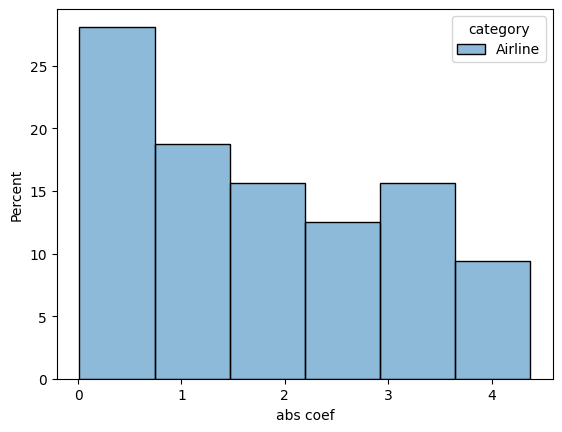

In [20]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airline"], x="abs coef", hue="category", stat="percent")

<Axes: xlabel='abs coef', ylabel='Percent'>

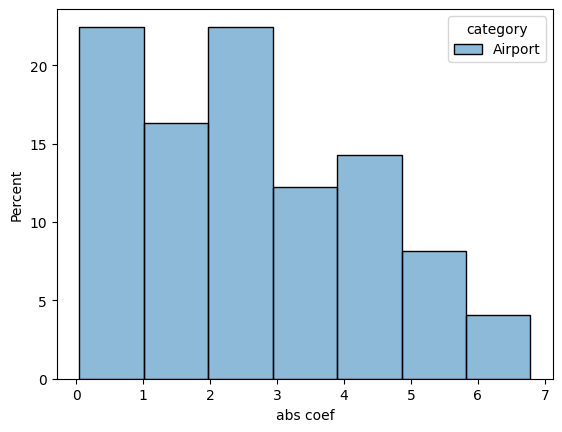

In [21]:
sns.histplot(data=lin_reg_coefs[lin_reg_coefs["category"] == "Airport"], x="abs coef", hue="category", stat="percent")

# Hypothesis Testing

# Question 1)
Among all airports and airlines, do airports or airlines have a larger influnce on delays

null: adverage coef of airports is the same as the adverage coef of airlines
Alternative: adverage coef of airports is greater than the adverage coef of airlines

In [22]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs

,name,coef,category
0,Reporting_Airline_AA,-0.069569,Airline
1,Reporting_Airline_AS,-1.029725,Airline
2,Reporting_Airline_B6,4.661522,Airline
3,Reporting_Airline_CO,-0.424763,Airline
4,Reporting_Airline_DH,1.722580,Airline
...,...,...,...
432,Origin_XWA,-14.188019,Airport
433,Origin_YAK,-5.644320,Airport
434,Origin_YAP,-6.364347,Airport
435,Origin_YKM,-8.912375,Airport


In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal')
print(f'Statsmodels api: {sm_result}')

Statsmodels api: (-0.05581475934766633, 2.923180199342047)


In [29]:
xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="larger")

(0.18536963518433547, inf)

In [30]:
xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="smaller")

(-inf, 2.681995804810045)

# Permutation Experiment

In [43]:
sample_diff = lin_reg_coefs.groupby("category").mean().diff().iloc[1, 0]

C:\Users\seanh\AppData\Local\Temp\ipykernel_37724\1806402348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sample_diff = lin_reg_coefs.groupby("category").mean().diff().iloc[1, 0]


In [46]:
lin_reg_coefs.groupby("category").mean()

C:\Users\seanh\AppData\Local\Temp\ipykernel_37724\1151218858.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lin_reg_coefs.groupby("category").mean()


,coef
category,
Airline,0.712915
Airport,-0.720768


In [55]:
lin_reg_coefs["category"].sample(frac=1)

336    Airport
181    Airport
257    Airport
402    Airport
199    Airport
        ...   
41     Airport
53     Airport
198    Airport
57     Airport
225    Airport
Name: category, Length: 437, dtype: object

In [58]:
def run_permutation(df, category="category", operation=lambda x, y: 0, n=1000):
    random_df = df.copy(deep=True)
    sample_stat = operation(df, category)
    sim_stats = []
    for _ in range(1000):
        random_df["simulated"] = random_df[category].sample(frac=1).reset_index(drop=True)
        sim_stats.append(
            operation(random_df, "simulated")
        )
    return np.array(sim_stats), sample_stat

diff_means = lambda df, category: df.groupby(category).mean().diff().iloc[1, 0]
sim_stats, sample_stat = run_permutation(lin_reg_coefs, category="category", operation=diff_means, n=1000)

C:\Users\seanh\AppData\Local\Temp\ipykernel_37724\3605456515.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_means = lambda df, category: df.groupby(category).mean().diff().iloc[1, 0]
C:\Users\seanh\AppData\Local\Temp\ipykernel_37724\3605456515.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_means = lambda df, category: df.groupby(category).mean().diff().iloc[1, 0]
C:\Users\seanh\AppData\Local\Temp\ipykernel_37724\3605456515.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either speci

In [59]:
sim_stats, sample_diff

(array([ 2.10282338,  1.42924738,  2.85246599, -0.60646761, -1.08208858,
        -2.61609203, -0.01518574,  1.36870666, -3.85629068, -5.96347982,
         3.56590422, -0.12367757,  0.85955623,  0.92990963, -3.77164364,
        -2.58083574, -0.68186462,  1.1528734 , -0.15826271, -6.65053723,
         1.45452401,  2.67074761, -0.83269411, -1.54138234, -1.44019185,
         1.42557298,  1.99664037,  2.12257654,  2.91592859,  1.29239551,
        -0.24229767,  1.63118529, -0.65464238, -5.25336789,  2.88021398,
        -3.61270222,  1.59402354,  0.17860487,  1.98866027,  2.71428696,
        -0.28041527, -2.35402686, -1.02769715, -2.61115189,  0.47805464,
        -0.37629348,  0.12210847, -1.80813058, -0.82958388, -1.26544478,
        -2.78074743,  2.16260735,  1.24059004,  3.33331436, -0.37234113,
         0.4114229 ,  1.23122   , -0.26030593,  0.17382137,  1.59384058,
        -0.02209421, -7.43332411,  1.42273736, -0.66616932,  2.32858139,
        -0.63487044, -2.50439304, -0.24857524, -0.1

In [60]:
np.sum(sample_diff > sim_stats)

241

In [61]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

In [62]:
sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="larger"), 
sm_result

((-4.756756111851738, inf),)

In [63]:
sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal', alternative="smaller"), 
sm_result

((-inf, -2.751162626531346),)

In [65]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=6.174076074024613, pvalue=9.352199563542947e-10)

In [66]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=-1.897555702482134, pvalue=0.970430453790775)

In [67]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"],
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=1.897555702482134, pvalue=0.029569546209225035)

In [68]:
airline_data = pd.read_csv("flight_data.csv", low_memory = False)
df = airline_data.loc[~airline_data["DepDelay"].isnull(), ["DepDelay", "Reporting_Airline", "Origin"]]
df = df[df["Origin"].isin(top_50_airorts)]

X = OneHotEncoder(drop='first').fit_transform(df[["Reporting_Airline", "Origin"]])
reg = LinearRegression().fit(X, df[["DepDelay"]])
cols = OneHotEncoder(drop='first').fit(df[["Reporting_Airline", "Origin"]]).get_feature_names_out()
lin_reg_coefs = pd.DataFrame({"name": cols, "coef": reg.coef_[0]})
lin_reg_coefs["category"] = lin_reg_coefs["name"].str.contains("Origin").replace({True: "Airport", False: "Airline"})
lin_reg_coefs["abs coef"] = np.abs(lin_reg_coefs["coef"])

xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"]), 
    sm.stats.DescrStatsW(lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((-1.408646601480585, -0.039375035156336224),)

In [69]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "abs coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "abs coef"], 
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=2.1054667053565983, pvalue=0.019240301312312455)

In [71]:
import scipy.stats as stats
stats.ttest_ind(
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airport", "coef"], 
    lin_reg_coefs.loc[lin_reg_coefs["category"] == "Airline", "coef"],
    
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=3.9536252876070623, pvalue=0.00010613206757001293)